# Homework 2
## Ahmet Buğra Taksuk - 2017402168


- In this homework, we are asked to perform some dimensionality reduction operations via PCA and MDS using different similarity measure with different datasets.In the first part, I applied PCA, MDS with euclidean distance and MDS with manhattan distance to see whether the classes are easy to differ or not. Then I compared these results. In the second part, I tried to reconstruct the Turkey map by reducing the distance matrix of the Turkey applying PCA. Lastly for the final part,  I used distance occured(location) on 3D plot and most of the visualizations seemed similar to the gestures in the homework definition and for the b part I reduced the dimension of instances by using PCA. The data we worked on for the gesture recognition was from https://drive.google.com/drive/u/1/folders/13553neknux7U8why55KM1WrjgkA9IJKm . 

In [1]:
# Necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from scipy.spatial import distance
sns.set(rc={'figure.figsize':(8,6)})

## Task 1 ) - Dimensionality Reduction

In [4]:
# Reading data 

df = pd.read_csv("IE582_Fall21_HW2_q1_data.csv")
df.head()

,X1,X2,class
0,0.569483,0.822003,a
1,0.411469,0.911424,a
2,0.417385,-0.908730,a
3,-0.791828,0.610745,a
4,-0.806777,-0.590857,a


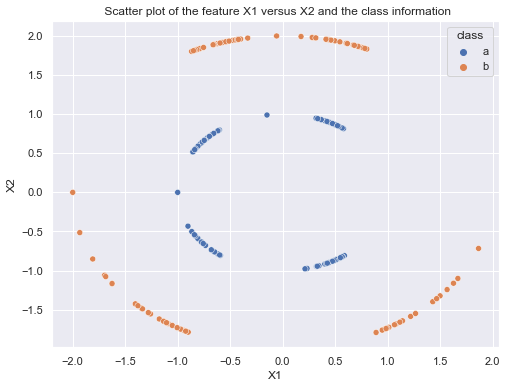

In [5]:
sns.scatterplot(x = "X1" , y = "X2" , data = df, hue = "class")
plt.title(" Scatter plot of the feature X1 versus X2 and the class information")
plt.show();

### Part A ) - Applying PCA

- Scaling the feature values before PCA

In [6]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
features = ['X1', 'X2']
x = df.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [7]:
# Applying PCA to reduce dimension to one-dimension

from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)

# Adding PCA column to the dataset 
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component'])
finaldf = pd.concat([principalDf, df[['class']]], axis = 1)

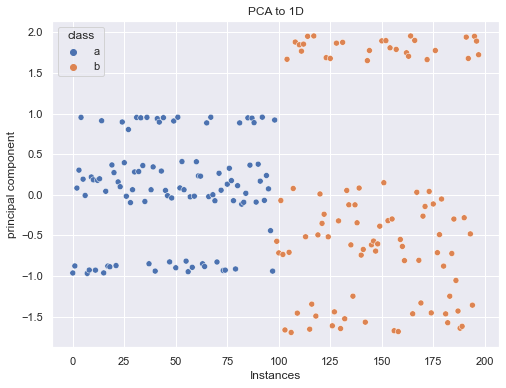

In [8]:
sns.scatterplot(x = finaldf.index, y = "principal component" , data = finaldf, hue = "class")
plt.xlabel("Instances")
plt.title("PCA to 1D")
plt.show();

### Part B ) - Applying MDS 

In [10]:
from sklearn.manifold import MDS # for MDS dimensionality reduction

- 1 ) Similarity Measure : Euclidean 

In [11]:

# Separating out the features
features = ['X1', 'X2']
x = df.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)


model1d=MDS(n_components=1, 
          metric=True, 
          n_init=4, 
          max_iter=300, 
          verbose=0, 
          eps=0.001, 
          n_jobs=None, 
          random_state=42, 
          dissimilarity='euclidean')

### Step 2 - Fit the data and transform it, so we have 1 dimensions instead of 2
x = model1d.fit_transform(x)

In [12]:
# Adding the MDS information to the dataset

euclidean = pd.DataFrame(x, columns = ["MDS"], index = df.index)
euclidean["class"] = df["class"]

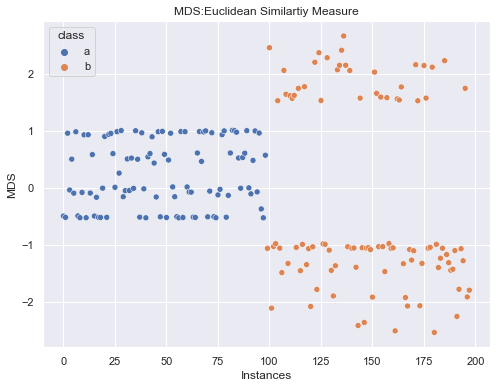

In [14]:
sns.scatterplot(x = finaldf.index, y = "MDS" , data = euclidean, hue = "class")
plt.xlabel("Instances")
plt.title("MDS:Euclidean Similartiy Measure")
plt.show();

- 2 ) Similarity Measure : Minkowski L1 Norm

In [19]:
# Library to calculate distances, similarity measures

from scipy.spatial import distance

In [21]:

# Separating out the features again 
features = ['X1', 'X2']
X = df.loc[:, features].values

#Adding class information to new dataset
X = pd.DataFrame(X)
X["class"] = df["class"]

# Calculating distance measure 
X["MDS_Minkowski"] = 0.000000000
for i in range(0,len(X)):
    X["MDS_Minkowski"][i] = distance.minkowski(X[0][i], X[1][i])


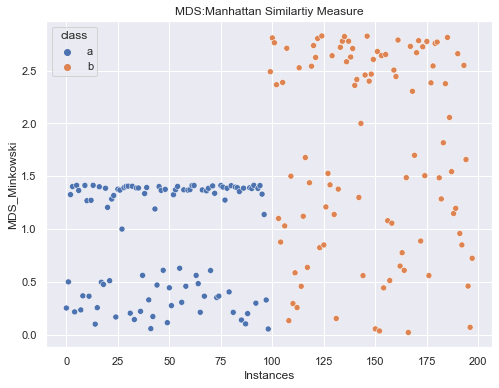

In [22]:
sns.scatterplot(x = finaldf.index, y = "MDS_Minkowski" , data = X, hue = "class")
plt.xlabel("Instances")
plt.title("MDS:Manhattan Similartiy Measure")
plt.show();

### Part C ) - Comparison

- When we are to use the PCA, we are able to differentitate the classes based on where the points accumulates most. For example, class a values mostly in the neighborhood of the set(-1,1) whereas the class b values are mostly in the neighborhood of the set (-2,2). But near zero area, it would be hard to differentiate the classes if the instances of each class is not respectively ordered. This is due to the fact that both class has a circle shape.  

- When we are to use MDS, the classes are easier to differentiate. As we are using the MDS with simlarity measure euclidean, there are only three subgropus. Class A is in the neighborhood of the set (-1,1) and the class be is in the neighborhood of the sets (-2,-1) U (1,2). Therefore the classes are almost identified clearly. Nonetheless, if we are to use manhattan distance(which is the L1 norm of Minkowski family), it is hard to identify the class be because it is nearly spread over the set (-2,2). 

- If we decide to compare PCA and MDS, MDS with euclidean distance seems to be a better option since it has only three subgroups which makes it easier to identify classes. 

### Part D ) - Adding Latent Variables

In [23]:
df["X1^2"] = df["X1"] * df["X1"]
df["X2^2"] = df["X2"] * df["X2"]
df["X1.X2"] = df["X1"] * df["X2"]
df

,X1,X2,class,X1^2,X2^2,X1.X2
0,0.569483,0.822003,a,0.324311,0.675689,0.468117
1,0.411469,0.911424,a,0.169307,0.830693,0.375023
2,0.417385,-0.908730,a,0.174210,0.825790,-0.379290
3,-0.791828,0.610745,a,0.626991,0.373009,-0.483604
4,-0.806777,-0.590857,a,0.650889,0.349111,0.476689
...,...,...,...,...,...,...
193,-0.662932,1.886934,b,0.439479,3.560521,-1.250910
194,0.316428,1.974810,b,0.100127,3.899873,0.624885
195,-1.625464,-1.165275,b,2.642134,1.357866,1.894113
196,-1.378755,-1.448804,b,1.900966,2.099034,1.997547


In [24]:
# Standardization before PCA
features = ['X1', 'X2', "X1.X2", "X1^2", "X2^2"]
# Separating out the features
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [25]:
# "mle" command is used to decide the number of components in PCA

from sklearn.decomposition import PCA
pca = PCA(n_components='mle')
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])

In [124]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4
0,-0.474056,0.126646,-0.938850,-0.596151
1,-0.614025,-0.029109,-0.992744,-0.479083
2,-0.115455,1.005956,-0.820416,-0.526768
3,0.296854,-0.056194,-1.012590,0.995329
4,1.115203,-0.167387,-0.994940,0.103948
...,...,...,...,...
193,-1.493999,-0.772364,0.719191,1.352170
194,-1.768528,-1.320536,0.673646,-0.587912
195,3.400600,-1.082482,0.987617,0.292484
196,2.686885,-1.213901,0.894535,-0.362772


In [125]:
print(f"""Eigen Values are : 
First Component : {pca.components_[0]}
Second Component : {pca.components_[1]}
Third Component : {pca.components_[2]}
Fourth Component : {pca.components_[3]}
""")


Eigen Values are : 
First Component : [-0.41919697 -0.53844537  0.3480122   0.53876725 -0.35066772]
Second Component : [ 0.55637549 -0.454384   -0.59970677  0.16247213 -0.31294743]
Third Component : [ 0.12826946 -0.08814923 -0.0736623   0.57831433  0.7974353 ]
Fourth Component : [-0.57121749  0.3684325  -0.66878286  0.27300058 -0.12715443]



In [126]:
print(f"""They refer to : 
First Component : {pca.components_[0][0]} * X1 + {pca.components_[0][1]} * X2 + {pca.components_[0][2]} * X1^2 + {pca.components_[0][3]} * X2^2 + {pca.components_[0][4]} * X1.X2  
Second Component : {pca.components_[1][0]} * X1 + {pca.components_[1][1]} * X2 + {pca.components_[1][2]} * X1^2 + {pca.components_[1][3]} * X2^2 + {pca.components_[1][4]} * X1.X2
Third Component : {pca.components_[2][0]} * X1 + {pca.components_[2][1]} * X2 + {pca.components_[2][2]} * X1^2 + {pca.components_[2][3]} * X2^2 + {pca.components_[2][4]} * X1.X2  
Fourth Component : {pca.components_[3][0]} * X1 + {pca.components_[3][1]} * X2 + {pca.components_[3][2]} * X1^2 + {pca.components_[3][3]} * X2^2 + {pca.components_[3][4]} * X1.X2
""")

They refer to : 
First Component : -0.4191969661732672 * X1 + -0.5384453700060595 * X2 + 0.34801219598671557 * X1^2 + 0.5387672475673815 * X2^2 + -0.3506677223003842 * X1.X2  
Second Component : 0.5563754933768121 * X1 + -0.45438399902357557 * X2 + -0.5997067650472111 * X1^2 + 0.16247213404899313 * X2^2 + -0.3129474291558045 * X1.X2
Third Component : 0.12826946146515877 * X1 + -0.0881492289702244 * X2 + -0.07366229760847556 * X1^2 + 0.5783143349812225 * X2^2 + 0.7974352980359348 * X1.X2  
Fourth Component : -0.5712174866223646 * X1 + 0.36843249877943446 * X2 + -0.6687828571973569 * X1^2 + 0.27300058141320976 * X2^2 + -0.12715443085854475 * X1.X2



In [127]:
print(f"""
First Component explains the {pca.explained_variance_ratio_[0]*100} percent of the variance
Second Component explains the {pca.explained_variance_ratio_[1]*100} percent of the variance
Third Component explains the {pca.explained_variance_ratio_[2]*100} percent of the variance
Fourth Component explains the {pca.explained_variance_ratio_[3]*100} percent of the variance
""")


First Component explains the 34.398320669683805 percent of the variance
Second Component explains the 26.49136250673278 percent of the variance
Third Component explains the 18.909482909709467 percent of the variance
Fourth Component explains the 12.763815926844046 percent of the variance



## Task 2 ) Reconstructing Turkey Map

In [26]:
dist = pd.read_excel("ilmesafe.xls" ,header = 2, index_col = 1)

In [27]:
dist.drop(columns = "İL PLAKA NO", inplace = True)

In [28]:
dist.head(3)

,ADANA,ADIYAMAN,AFYONKARAHİSAR,AĞRI,AMASYA,ANKARA,ANTALYA,ARTVİN,AYDIN,BALIKESİR,BİLECİK,BİNGÖL,BİTLİS,BOLU,BURDUR,BURSA,ÇANAKKALE,ÇANKIRI,ÇORUM,DENİZLİ,DİYARBAKIR,EDİRNE,ELAZIĞ,ERZİNCAN,ERZURUM,ESKİŞEHİR,GAZİANTEP,GİRESUN,GÜMÜŞHANE,HAKKARİ,HATAY,ISPARTA,MERSİN,İSTANBUL,İZMİR,KARS,KASTAMONU,KAYSERİ,KIRKLARELİ,KIRŞEHİR,KOCAELİ (İZMİT),KONYA,KÜTAHYA,MALATYA,MANİSA,KAHRAMANMARAŞ,MARDİN,MUĞLA,MUŞ,NEVŞEHİR,NİĞDE,ORDU,RİZE,SAKARYA (ADAPAZARI),SAMSUN,SİİRT,SİNOP,SİVAS,TEKİRDAĞ,TOKAT,TRABZON,TUNCELİ,ŞANLIURFA,UŞAK,VAN,YOZGAT,ZONGULDAK,AKSARAY,BAYBURT,KARAMAN,KIRIKKALE,BATMAN,ŞIRNAK,BARTIN,ARDAHAN,IĞDIR,YALOVA,KARABÜK,KİLİS,OSMANİYE,DÜZCE
İL ADI,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ADANA,NaN,335.0,575.0,966.0,603.0,567.0,535.0,1035.0,874.0,903.0,773.0,636.0,732.0,690.0,646.0,842.0,1094.0,577.0,581.0,755.0,525.0,1178.0,494.0,670.0,809.0,690.0,212.0,720.0,778.0,898.0,191.0,617.0,69.0,948.0,901.0,1014.0,683.0,335.0,1159.0,377.0,837.0,358.0,675.0,396.0,885.0,192.0,537.0,846.0,743.0,289.0,207.0,707.0,919.0,800.0,719.0,707.0,845.0,422.0,1079.0,491.0,844.0,628.0,349.0,690.0,893.0,489.0,765.0,267.0,800.0,292.0,477.0,621.0,709.0,782.0,1042.0,1066.0,899.0,714.0,246.0,87.0,735.0
ADIYAMAN,335.0,NaN,910.0,648.0,632.0,814.0,870.0,751.0,1209.0,1238.0,1040.0,348.0,414.0,931.0,981.0,1109.0,1380.0,766.0,696.0,1090.0,207.0,1423.0,285.0,550.0,525.0,957.0,150.0,710.0,683.0,660.0,316.0,952.0,404.0,1193.0,1236.0,730.0,872.0,419.0,1404.0,553.0,1082.0,693.0,1010.0,187.0,1220.0,163.0,299.0,1181.0,459.0,500.0,542.0,724.0,784.0,1045.0,748.0,389.0,888.0,412.0,1324.0,520.0,783.0,419.0,112.0,1025.0,575.0,616.0,1006.0,575.0,650.0,627.0,666.0,303.0,471.0,1023.0,758.0,748.0,1147.0,955.0,210.0,248.0,976.0
AFYONKARAHİSAR,575.0,910.0,NaN,1318.0,597.0,300.0,290.0,1243.0,345.0,328.0,212.0,1095.0,1285.0,420.0,169.0,277.0,519.0,397.0,505.0,222.0,1100.0,684.0,953.0,948.0,1138.0,144.0,787.0,871.0,1015.0,1473.0,766.0,168.0,565.0,454.0,326.0,1340.0,503.0,521.0,665.0,426.0,343.0,223.0,100.0,855.0,310.0,767.0,1112.0,367.0,1202.0,440.0,459.0,827.0,1082.0,306.0,677.0,1282.0,675.0,703.0,585.0,643.0,1007.0,1079.0,924.0,115.0,1418.0,479.0,488.0,365.0,1037.0,336.0,339.0,1196.0,1284.0,515.0,1351.0,1461.0,338.0,447.0,821.0,662.0,375.0


In [29]:
# Setting NaN values to zero 

x = dist.fillna(0).values

In [30]:
# Applying MDS with euclidean distance

model1d=MDS(n_components=2, 
          metric=True, 
          n_init=4, 
          max_iter=300, 
          verbose=0, 
          eps=0.001, 
          n_jobs=None, 
          random_state=42, 
          dissimilarity='euclidean')

### Step 2 - Fit the data and transform it, so we have 1 dimensions instead of 2
x = model1d.fit_transform(x)

In [31]:
#Creating a new dataframe and setting index to city names 

x = pd.DataFrame(x, columns = ["X1", "X2"])
x.index = dist.index

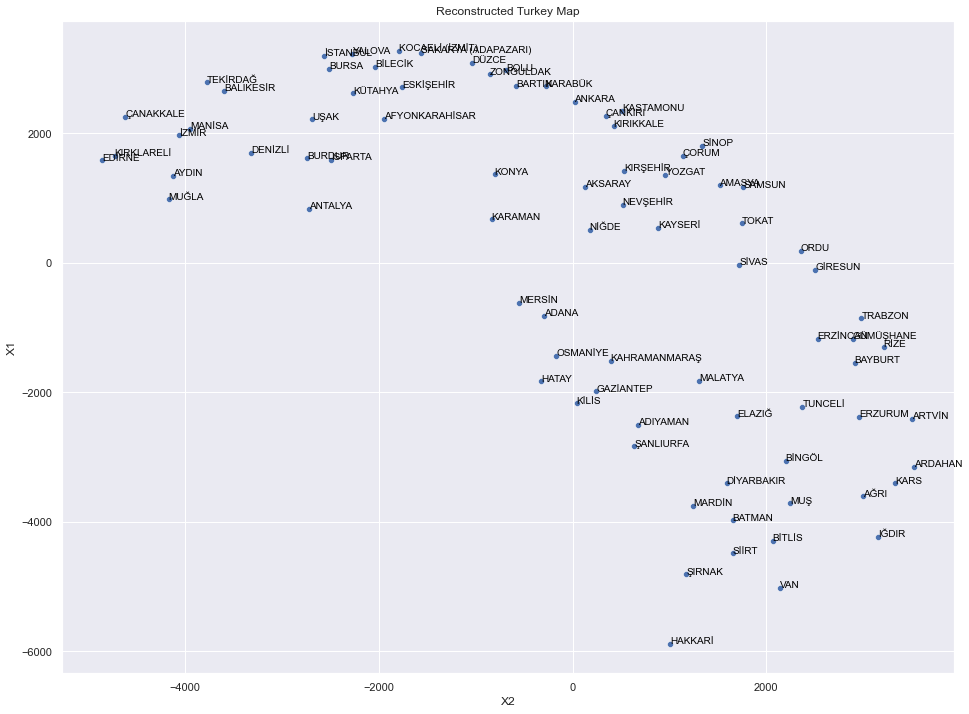

In [36]:
sns.set(rc={'figure.figsize':(16,12)})
sns.scatterplot(data=x,x="X2",y="X1")
plt.title("Reconstructed Turkey Map")
for i in range(x.shape[0]):
    plt.text(x=x.X2[i]-0.5,y=x.X1[i]-0.5,s=x.index[i], 
          fontdict=dict(color='black',size=10))
plt.show()

- There are some unusual behaviours for the reconstructed map. First, the angle of the map is not true. It should rotate 45 degree to the left to see it like a Turkey map. Other than that, the cities around the sides seems fine, especially the cities in the east side seems accurate, however the cities around northwest are closer to each other rather than usual. Lastly, since this measures are the length of roads between cities not the euclidean distance, some distances between cities are longer than usual becuase of the geographic properties. To examplify, the euclidean distance between Antalya and Mersin is shorter than this represented value but they seem very far from each other because of this geopgraphic features. 

## Task 3 ) Dimensionality Reduction for Time Series Data

### Part A ) Gesture Recognition

In [37]:
x = pd.read_csv("uWaveGestureLibrary_X_TRAIN", delim_whitespace=True, header = None )
y = pd.read_csv("uWaveGestureLibrary_Y_TRAIN" ,delim_whitespace=True,  header = None )
z = pd.read_csv("uWaveGestureLibrary_Z_TRAIN", delim_whitespace=True,  header = None)

In [38]:
# Values are sorted with respect to class information 

x.sort_values(by = 0, inplace = True)

In [39]:
# Class Information is added to the columns from the rows

classes = x[0]
x.pop(0)
x.insert(0, "Class_ID", classes)

In [40]:
# Number of Instances is added to the columns from the rows

instances = list(range(1,897))
x.insert(0,"Instances", instances) 

In [41]:
# Melt function is used to represent the data visually better, so long version is used 

x = pd.melt(x,id_vars = ["Class_ID", "Instances"] , var_name = "Time", value_name = "Acceleration_X")

#Then Values are sorted wrt its Class, Instance and Time step information  

x.sort_values(by = ["Class_ID" ,  "Instances", "Time"] , axis = 0, inplace = True)

In [42]:
# Same manipulations for the axes Y

y.sort_values(by = 0, inplace = True)
classes = y[0]
y.pop(0)
y.insert(0, "Class_ID", classes)
y.insert(0,"Instances", instances) 
y = pd.melt(y,id_vars = ["Class_ID", "Instances"] , var_name = "Time", value_name = "Acceleration_Y")
y.sort_values(by = ["Class_ID" ,  "Instances", "Time"] , axis = 0, inplace = True)

In [43]:
# Same manipulations for the axes Y

z.sort_values(by = 0, inplace = True)
classes = z[0]
z.pop(0)
z.insert(0, "Class_ID", classes)
z.insert(0,"Instances", instances) 
z = pd.melt(z,id_vars = ["Class_ID", "Instances"] , var_name = "Time", value_name = "Acceleration_Z")
z.sort_values(by = ["Class_ID" ,  "Instances", "Time"] , axis = 0, inplace = True)


In [44]:
df = x.copy()
df["Acceleration_Y"] = y["Acceleration_Y"]
df["Acceleration_Z"] = z["Acceleration_Z"]
df.set_index("Time", inplace = True)

In [46]:
# Adding the speed information for all axes

df["Speed_X"] = df["Acceleration_X"].cumsum()
df["Speed_Y"] = df["Acceleration_Y"].cumsum()
df["Speed_Z"] = df["Acceleration_Z"].cumsum()

In [47]:
# Adding the location information for all axes

df["Location_X"] = df["Speed_X"].cumsum()
df["Location_Y"] = df["Speed_Y"].cumsum()
df["Location_Z"] = df["Speed_Z"].cumsum()

In [48]:
df.head()

,Class_ID,Instances,Acceleration_X,Acceleration_Y,Acceleration_Z,Speed_X,Speed_Y,Speed_Z,Location_X,Location_Y,Location_Z
Time,,,,,,,,,,,
1,1.0,1,0.244291,-1.252598,-0.134824,0.244291,-1.252598,-0.134824,0.244291,-1.252598,-0.134824
2,1.0,1,0.244291,-1.252598,-0.134824,0.488581,-2.505197,-0.269647,0.732872,-3.757795,-0.404471
3,1.0,1,0.244291,-1.252598,-0.134824,0.732872,-3.757795,-0.404471,1.465743,-7.515590,-0.808942
4,1.0,1,0.244291,-1.252598,-0.134824,0.977162,-5.010393,-0.539294,2.442905,-12.525983,-1.348236
5,1.0,1,0.244291,-1.252598,-0.134824,1.221453,-6.262992,-0.674118,3.664358,-18.788975,-2.022354


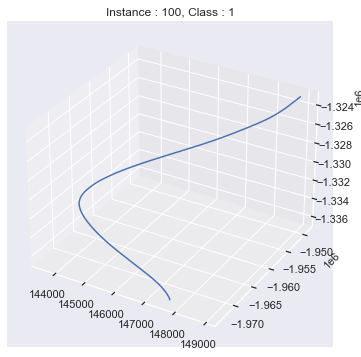

In [49]:
# Examplery Plot Code for each gesture
sns.set(rc={'figure.figsize':(9,6)})
fig = plt.figure()
ax = plt.axes(projection='3d')
x_data = df[(df["Class_ID"] == 1) & (df["Instances"] == 100)]["Location_X"]
y_data = df[(df["Class_ID"] == 1) & (df["Instances"] == 100)]["Location_Y"]
z_data = df[(df["Class_ID"] == 1) & (df["Instances"] == 100)]["Location_Z"]
plt.title("Instance : 100, Class : 1")
ax.plot3D(x_data,y_data,z_data);

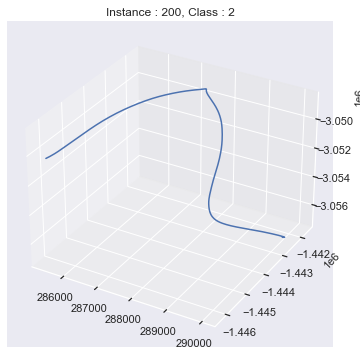

In [204]:
fig = plt.figure()
ax = plt.axes(projection='3d')
time = df[(df["Class_ID"] == 2) & (df["Instances"] ==210)].index
x_data = df[(df["Class_ID"] == 2) & (df["Instances"] == 210)]["Location_X"]
y_data = df[(df["Class_ID"] == 2) & (df["Instances"] == 210)]["Location_Y"]
z_data = df[(df["Class_ID"] == 2) & (df["Instances"] == 210)]["Location_Z"]
plt.title("Instance : 200, Class : 2")
ax.plot3D(x_data,z_data,y_data);

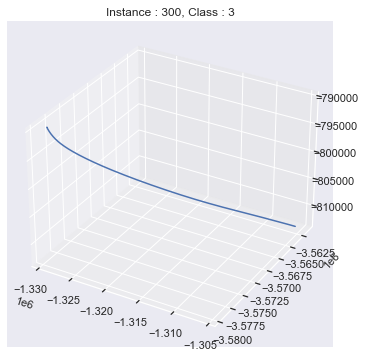

In [205]:
fig = plt.figure()
ax = plt.axes(projection='3d')
time = df[(df["Class_ID"] == 3) & (df["Instances"] == 300)].index
x_data = df[(df["Class_ID"] == 3) & (df["Instances"] == 306)]["Location_X"]
y_data = df[(df["Class_ID"] == 3) & (df["Instances"] == 306)]["Location_Y"]
z_data = df[(df["Class_ID"] == 3) & (df["Instances"] == 306)]["Location_Z"]
plt.title("Instance : 300, Class : 3")
ax.plot3D(x_data,y_data,z_data);

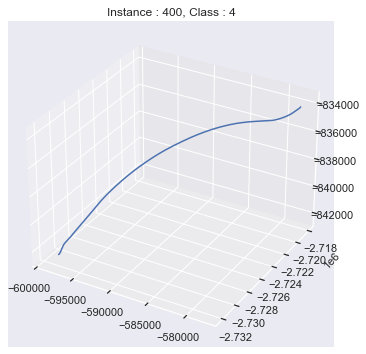

In [206]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x_data = df[(df["Class_ID"] == 4) & (df["Instances"] == 400)]["Location_X"]
y_data = df[(df["Class_ID"] == 4) & (df["Instances"] == 400)]["Location_Y"]
z_data = df[(df["Class_ID"] == 4) & (df["Instances"] == 400)]["Location_Z"]
plt.title("Instance : 400, Class : 4")
ax.plot3D(x_data,y_data,z_data);

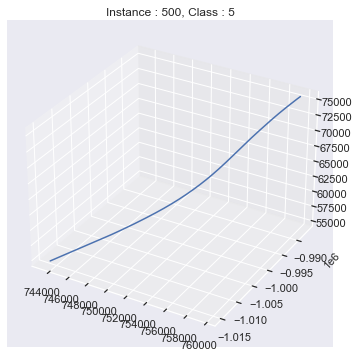

In [207]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x_data = df[(df["Class_ID"] == 5) & (df["Instances"] == 500)]["Location_X"]
y_data = df[(df["Class_ID"] == 5) & (df["Instances"] == 500)]["Location_Y"]
z_data = df[(df["Class_ID"] == 5) & (df["Instances"] == 500)]["Location_Z"]
plt.title("Instance : 500, Class : 5")
ax.plot3D(x_data,y_data,z_data);

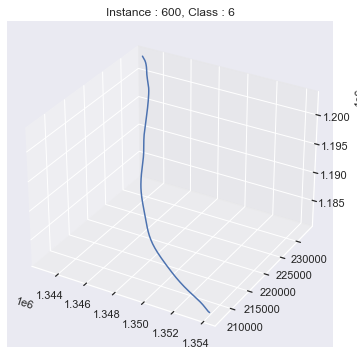

In [208]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x_data = df[(df["Class_ID"] == 6) & (df["Instances"] == 600)]["Location_X"]
y_data = df[(df["Class_ID"] == 6) & (df["Instances"] == 600)]["Location_Y"]
z_data = df[(df["Class_ID"] == 6) & (df["Instances"] == 600)]["Location_Z"]
plt.title("Instance : 600, Class : 6")
ax.plot3D(x_data,y_data,z_data);

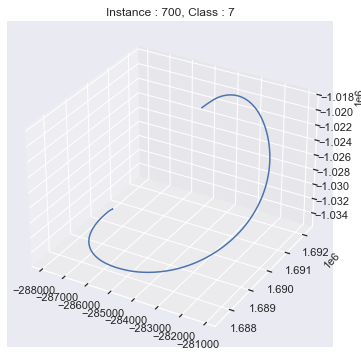

In [209]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x_data = df[(df["Class_ID"] == 7) & (df["Instances"] == 700)]["Location_X"]
y_data = df[(df["Class_ID"] == 7) & (df["Instances"] == 700)]["Location_Y"]
z_data = df[(df["Class_ID"] == 7) & (df["Instances"] == 700)]["Location_Z"]
plt.title("Instance : 700, Class : 7")
ax.plot3D(z_data,x_data,y_data);

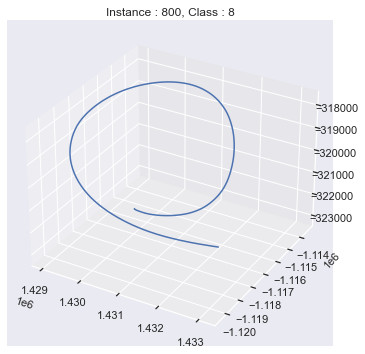

In [210]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x_data = df[(df["Class_ID"] == 8) & (df["Instances"] == 800)]["Location_X"]
y_data = df[(df["Class_ID"] == 8) & (df["Instances"] == 800)]["Location_Y"]
z_data = df[(df["Class_ID"] == 8) & (df["Instances"] == 800)]["Location_Z"]
plt.title("Instance : 800, Class : 8")
ax.plot3D(x_data,y_data,z_data);

- For this part, except some of the cases like class 2 and class 3, all plots seemed similar to the gestures defined in the homework description.

### Task B ) Applying PCA to concataned series

In [112]:
x = pd.read_csv("uWaveGestureLibrary_X_TRAIN", delim_whitespace=True, header = None )
y = pd.read_csv("uWaveGestureLibrary_Y_TRAIN" ,delim_whitespace=True,  header = None )
z = pd.read_csv("uWaveGestureLibrary_Z_TRAIN", delim_whitespace=True,  header = None)

In [113]:
classes = x[0]
x.pop(0)
y.pop(0)
z.pop(0)
df = pd.concat([x,y,z] , axis = 1,ignore_index=True)
df.insert(0,"Class_ID", classes)

In [114]:
pca_s = []

for i in range(1,9):
    x = df[df["Class_ID"] ==i].drop(columns = "Class_ID")
    pca_new = PCA(n_components = 2)
    pca_new.fit_transform(x)
    pca_s.append(pca_new)

In [119]:
for i in range(1,9):
    print("For class: " + str(i))
    print("Explained variability: " + str(pca_s[i-1].explained_variance_))
    print("Explained variability ratio: " + str(pca_s[i-1].explained_variance_ratio_))

For class: 1
Explained variability: [98.79577974 71.37192125]
Explained variability ratio: [0.2067785  0.14938066]
For class: 2
Explained variability: [155.07459104  60.57438499]
Explained variability ratio: [0.31945249 0.12478278]
For class: 3
Explained variability: [175.4175475   66.14816378]
Explained variability ratio: [0.29569272 0.1115027 ]
For class: 4
Explained variability: [125.3064461  101.09044217]
Explained variability ratio: [0.21498345 0.17343698]
For class: 5
Explained variability: [122.02062864 110.04251852]
Explained variability ratio: [0.25892972 0.23351198]
For class: 6
Explained variability: [192.572406    98.82050513]
Explained variability ratio: [0.27737549 0.14233808]
For class: 7
Explained variability: [159.13156251  81.50440945]
Explained variability ratio: [0.30390574 0.15565522]
For class: 8
Explained variability: [257.04065834 109.78414297]
Explained variability ratio: [0.43619669 0.18630313]


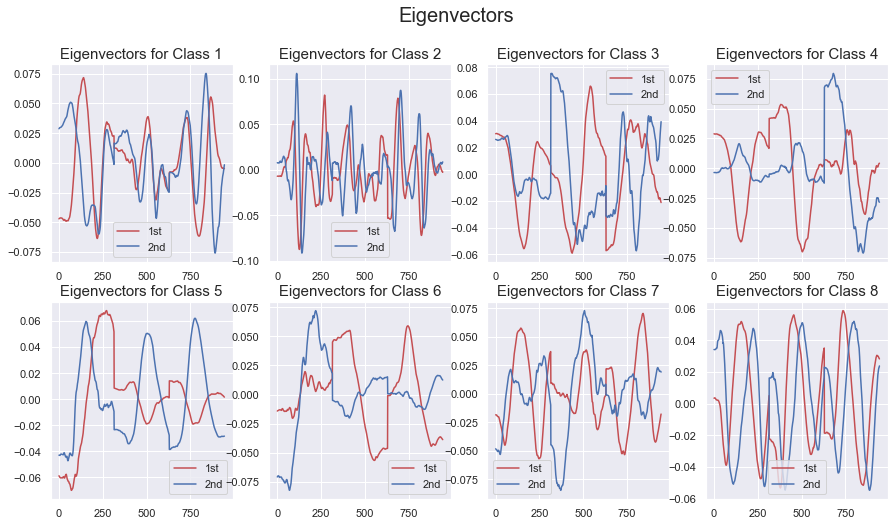

In [121]:
fig = plt.figure(figsize= (15,8))

for i in range(1,9):
    ax = fig.add_subplot(2, 4, i)
    ax.set_title("Eigenvectors for Class "+str(i), size =15)
    ax.plot(pca_s[i-1].components_[0], c = "r")
    ax.plot(pca_s[i-1].components_[1], c = "b")
    ax.legend(["1st","2nd"])

fig.suptitle("Eigenvectors",size = 20)

plt.show();

- The directions in which the represented variance is at the 2-highest values are represented by these eigenvectors. We can notice the general movement in 3-axes(x,y,z) one after another if we represent them as time series. It's worth noting that two eigenvectors often have distinct signed values, i.e. one is negative while the other is positive, and vice versa. The same can be stated for their values. Aside from that, the direction of linear arrows (class 3,4,5,6) can be determined by looking at the location of the 1st eigenvector's highest peak. Using x,y,z components to look at these eigenvectors in 2d or 3d space instead of this format may yield more concrete results.